Inspiration:
- [Berlin Marathons](https://medium.com/@moralescas/berlin-marathon-data-1974-2023-fd18f420906f)

Questions to be answered:
- **Olympic Marathon**
    - Which country won the most medals
- **NYC Marathon**
    - Difference between male and female times
    - Country with most winners
    - avg time per country
- **Berlin Marathon**
    - Where do most runners come from?
    - Where are the shortest times from?
    - Are these two places the same?
    - How did each country perform?
    - How have finishing times changed over the years?
    - How has the fastest time changed over the years?
- **Boston Marathon**:
    - how age affects race time
        - Fastest time per age group
    - difference in gender race times
- **Boston Marathon winners**:
    - Country with most winners
        - Show this on the map to show how geography can affect the outcomes
    - Avg time per country
    - Look at ¿avg? difference in time between men and women
- **Other**:
    - Does location of race affect times


Sources:
- [Berlin Marathon Data](https://www.kaggle.com/datasets/aiaiaidavid/berlin-marathons-data)
- [NYC Marathons](https://www.openintro.org/data/index.php?data=nyc_marathon)
- [Boston Marathon Data](https://data.scorenetwork.org/running/boston_marathon_2023.html)
- [Boston Marathon Winners Data](https://www.kaggle.com/datasets/zhikchen/boston-marathon-winners-men-and-women)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import panel as pn
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

pn.extension('tabulator')

import hvplot.pandas

## NYC Marathon

In [17]:
#files
#format: year, name, country, time, time_hrs, division[sex], note
#(only winners)
nyc_marathon = pd.read_csv('1_running_datasets/nyc_marathon.csv')

#format: year, location, Gold_Name, Gold_Country, Silver_Name, Silver_Country, Bronze_Name, Bronze_Country
#(only winners)
olympic_marathon = pd.read_csv('1_running_datasets/Olympic_Games.csv').drop(columns='Unnamed: 0')

#format: country, Gold, Silver, Bronze, Total
#(only winners)
olympic_country_medals = pd.read_csv('1_running_datasets/Olympic_Country_Medals.csv')

#format: year, country, gender, age, time
#(all participants)
berlin_marathon = pd.read_csv('1_running_datasets/berlin_marathon_1974_2023.csv')

#format: age_group, place_overall, place_gender, place_division, name, team, bib_number, half_time, finish_net, finish_gun, gender, half_time_sec, finish_net_sec, finish_gun_sec, finish_net_,minutes
#new format: name, age_group, place_gender, finish_net, finish_net_sed, finish_net_hour
#(all participants)(no country)
boston_marathon_2023 = pd.read_csv('1_running_datasets/boston_marathon_2023.csv')[['name', 'age_group', 'place_gender', 'finish_net', 'finish_net_sec']]
boston_marathon_2023['finish_net_hour'] = boston_marathon_2023['finish_net_sec']/3600
boston_marathon_2023

#format: Year, Winner, Country, Time, Distance(Miles), Distance(KM)
mens_boston_marathon_winners = pd.read_csv('1_running_datasets/Mens_Boston_Marathon_Winners.csv')
womens_boston_marathon_winners = pd.read_csv('1_running_datasets/Womens_Boston_Marathon_Winners.csv')

/var/folders/_p/y56kr6vs1fz7ycsbxhyqwwwc0000gn/T/ipykernel_67680/3334841572.py:16: DtypeWarning:

Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.



In [18]:
nyc_marathon_men = nyc_marathon.loc[nyc_marathon['division'] == 'Men']
nyc_marathon_women = nyc_marathon.loc[nyc_marathon['division'] == 'Women']
nyc_marathon_men

,year,name,country,time,time_hrs,division,note
0,1970,Gary Muhrcke,United States,02:31:38,2.527222,Men,Course record
2,1971,Norman Higgins,United States,02:22:54,2.381667,Men,Course record
4,1972,Sheldon Karlin,United States,02:27:52,2.464444,Men,NaN
6,1973,Tom Fleming,United States,02:21:54,2.365000,Men,Course record
8,1974,Norbert Sander,United States,02:26:30,2.441667,Men,NaN
10,1975,Tom Fleming,United States,02:19:27,2.324167,Men,"Course record, second victory"
12,1976,Bill Rodgers,United States,02:10:10,2.169444,Men,Course record
14,1977,Bill Rodgers,United States,02:11:28,2.191111,Men,Second victory
16,1978,Bill Rodgers,United States,02:12:12,2.203333,Men,Third victory
18,1979,Bill Rodgers,United States,02:11:42,2.195000,Men,Fourth victory


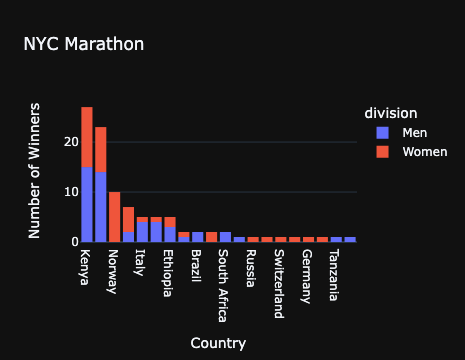

In [19]:
plot1 = px.histogram(nyc_marathon, x = 'country', 
             color = 'division',
             title = 'NYC Marathon',
             category_orders={'country': nyc_marathon['country'].value_counts().index},
             template='plotly_dark',
             labels = {'country':'Country', 'count': 'Number of Winners'},
            )
plot1.update_yaxes(title_text='Number of Winners')


In [20]:
nyc_marathon_ = nyc_marathon.groupby(['country','division']).size().unstack(fill_value = 0)
# nyc_marathon_women = nyc_marathon_women.groupby('country')['year'].count()
# nyc_marathon_.hvplot.barh('country', 'division')
nyc_marathon_plot = nyc_marathon_.hvplot(kind = 'bar', stacked = True, rot = 45)
nyc_marathon_plot

:Bars   [country,division]   (value)

<Axes: xlabel='year'>

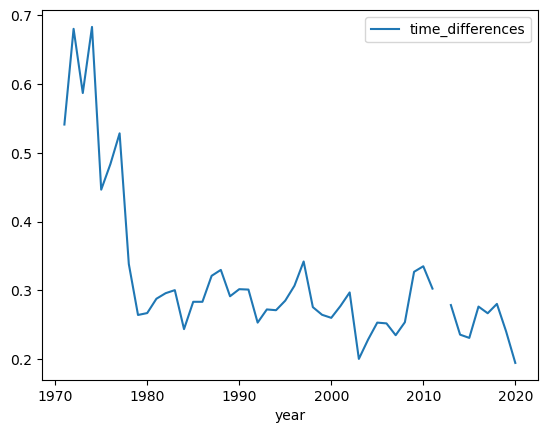

In [21]:
nyc_df_mf = pd.merge(nyc_marathon_men, nyc_marathon_women, on = ['year'], suffixes=('_men', '_women'))
nyc_df_mf['time_differences'] = nyc_df_mf['time_hrs_women'] - nyc_df_mf['time_hrs_men']

time_differences = pd.DataFrame()
time_differences['year'] = nyc_df_mf['year']
time_differences['time_differences'] = nyc_df_mf['time_hrs_women'] - nyc_df_mf['time_hrs_men']
time_differences.plot(x = 'year', y = 'time_differences')

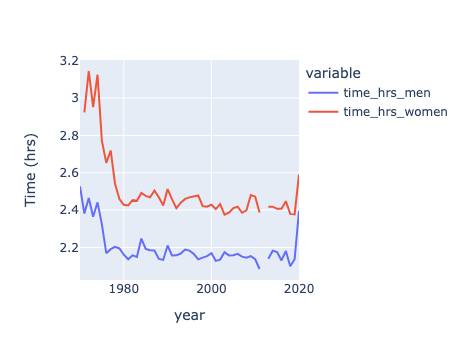

In [22]:
plot2 = px.line(nyc_df_mf, x = 'year', y = ['time_hrs_men', 'time_hrs_women'])
plot2.update_yaxes(title_text='Time (hrs)')




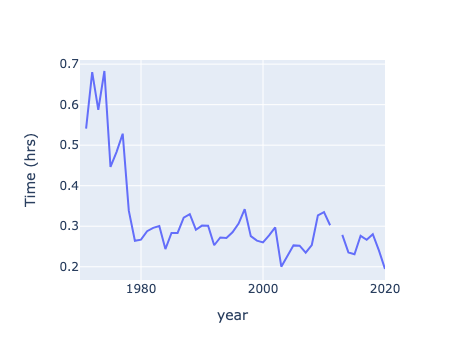

In [23]:
plot3 = px.line(nyc_df_mf, x = 'year', y = 'time_differences')
plot3.update_yaxes(title_text='Time (hrs)')


## Berlin Marathon
- How have average times changed over the years?
    - Overall average time has increased. Likely due to the increase in more amature runners.
- How has the fastest time changed over the years?
    - Finishing times have decreased. obvs. because records are meant to be broken.
- Where do most runners come from?
    - Germany
- Where are the shortest times from?
    - Kenya, followed by Ethiopia
- Are these two places the same?
    - no. no they are not.
- How did each country perform(avg time per country)?
- male vs female


In [24]:
#data cleaning
berlin_marathon = berlin_marathon[(berlin_marathon['time'] != '–')&
                                  (berlin_marathon['time'] != 'DSQ')&
                                  (berlin_marathon['time'] != 'no time')]
berlin_marathon['time_hrs'] = pd.to_timedelta(berlin_marathon['time']).dt.total_seconds() / 3600
berlin_marathon.dropna(subset = 'time_hrs', how='any')
berlin_marathon

,year,country,gender,age,time,time_hrs
0,2023,USA,female,30,05:43:44,5.728889
1,2023,GBR,female,35,03:03:37,3.060278
2,2023,IRL,female,40,02:52:59,2.883056
3,2023,BEL,male,40,03:12:14,3.203889
4,2023,GBR,female,65,04:21:40,4.361111
...,...,...,...,...,...,...
986648,2021,GER,male,30,07:28:28,7.474444
986649,2021,GER,male,30,07:28:29,7.474722
986650,2021,GER,male,80,07:29:14,7.487222
986651,2021,USA,female,20,07:39:21,7.655833


##### Average and Finishing times
- How have average times changed over the years?
    - Overall average time has increased. Likely due to the increase in more amature runners.
- How has the fastest time changed over the years?
    - Finishing times have decreased. obvs. because records are meant to be broken.

In [25]:
overall_times = pd.DataFrame(berlin_marathon.groupby('year')['time_hrs'].mean().rename('Average Times'))#.hvplot(kind = 'scatter', title = 'Average times over the years')
overall_times['Finishing times'] = berlin_marathon.groupby('year')['time_hrs'].min()
overall_times_plot = overall_times.hvplot(title = 'Average and Finishing times')
overall_times_plot

:NdOverlay   [Variable]
   :Curve   [year]   (value)

##### Where are most runners from?
- Where do most runners come from?
    - Germany
- Where are the shortest times from?
    - Kenya, followed by Ethiopia. Even tho Germany had the most participants ahaha
- Are these two places the same?
    - no. no they are not.

In [12]:
berlin_marathon_ = berlin_marathon.groupby(['country', 'gender']).size().sort_values(ascending = False)
berlin_marathon_ = berlin_marathon_[berlin_marathon_ > 1000]
berlin_marathon_plot = berlin_marathon_.hvplot(kind = 'bar', 
                                               stacked = True, 
                                               rot = 45,
                                               title = 'Where are most runners from?')
berlin_marathon_plot

:Bars   [country,gender]   (0)

In [13]:
berlin_marathon = berlin_marathon.dropna(subset=['country', 'gender']).sort_values(by = 'time_hrs')
berlin_marathon_ = berlin_marathon[:50].groupby(['country', 'gender']).size().sort_values(ascending = False)#.unstack(fill_value = 0)
berlin_marathon_plot = berlin_marathon_.hvplot(kind = 'bar', 
                                               stacked = True, 
                                               rot = 45,
                                               title = 'Where are the top 50 runners from?')
berlin_marathon_plot


:Bars   [country,gender]   (0)

In [31]:
template = pn.template.FastListTemplate(
    title = 'Berlin Marathon runners',
    sidebar = [pn.pane.Markdown("# Runners!")
              ],
    main = [pn.Row(pn.Row(overall_times_plot, berlin_marathon_plot))]
)
template.servable();

In [ ]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='World CO2 emission dashboard', 
    sidebar=[pn.pane.Markdown("# CO2 Emissions and Climate Change"), 
             pn.pane.Markdown("#### Carbon dioxide emissions are the primary driver of global climate change. It’s widely recognised that to avoid the worst impacts of climate change, the world needs to urgently reduce emissions. But, how this responsibility is shared between regions, countries, and individuals has been an endless point of contention in international discussions."), 
             pn.pane.PNG('climate_day.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Settings"),   
             year_slider],
    main=[pn.Row(pn.Column(yaxis_co2, 
                           co2_plot.panel(width=700), margin=(0,25)), 
                 co2_table.panel(width=500)), 
          pn.Row(pn.Column(co2_vs_gdp_scatterplot.panel(width=600), margin=(0,25)), 
                 pn.Column(yaxis_co2_source, co2_source_bar_plot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable();